# Subject 7: Covid-19

The goal of this exercise is to visualize covid-19 infections for some pre-selected countries. These countries are : Belgium, China, (China, Hong-Kong), France, Germany, Iran, Italy, Japan, (Korea, South), Netherlands, Portugal, Spain, United Kingdom, and the US. We take [these graphs](https://www.scmp.com/coronavirus?src=homepage_covid_widget) as a model.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

## Load and preprocess raw data
First of all, we load the data and process it so that we can deal with a unique format. In particular, we will check for empty entries, and check that the number of daily cases are integers.

In [24]:
# path to the data here
#data_path='C:/Users/ihoxha/Desktop/PhD/formations/recherche reproductible/time_series_covid19_confirmed_global.csv'

#alternatively: use the data url:
data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [25]:
raw_data = pd.read_csv(data_path)
raw_data

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
243                           NaN                Thailand  15.870032   
244                           NaN             Timor-Leste  -8.874217   
245                           NaN                    Togo   8.619500   
246                           NaN     Trinidad and Tobago  10.691800   
247                           NaN                 Tunisia  33.886917   
248                           NaN                  Turkey  38.963700   
249                           NaN                      US  40.000000   
250                           NaN                  Uganda   1.373333   
251                           NaN                 Ukraine  48.379400   
252                           NaN    United Arab Emirates  23.424076   
253                      Anguilla          United Kingdom  18.220600   
254                       Bermuda          United Kingdom  32.307800   
255        British Virgin Islands          United Kingdom  18.420700   
256                Cayman Islands          United Kingdom  19.313300   
257               Channel Islands          United Kingdom  49.372300   
258   Falkland Islands (Malvinas)          United Kingdom -51.796300   
259                     Gibraltar          United Kingdom  36.140800   
260                   Isle of Man          United Kingdom  54.236100   
261                    Montserrat          United Kingdom  16.742498   
262      Turks and Caicos Islands          United Kingdom  21.694000   
263                           NaN          United Kingdom  55.378100   
264                           NaN                 Uruguay -32.522800   
265                           NaN              Uzbekistan  41.377491   
266                           NaN                 Vanuatu -

In the next cells, we create a copy of the data void of empty entries. We are looking for:
- countries that do not share their data at all
- days at which no data was collected
- days at which one country did not subit their data

In [26]:
data_cut = raw_data.drop(['Country/Region','Province/State','Lat','Long'], axis = 1).copy()
#data_cut
data_cut[data_cut.isnull().any(axis=1)]

Empty DataFrame
Columns: [1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, 4/27/20, 4/28/20, 4/29/20, 4/30/20, ...]
Index: []

[0 rows x 369 columns]

This computation shows that there are no NaN in the record of number of cases. So we can go on with our interpretation.

## Plot cumulated cases per country of interest
As listed at the beginning, we focus on specific countries first. Since we have almost the same code to write every single time, we create a function that will compute the cumulated cases for a given country/region. The restrict_data table will be of great use. We have to be careful that we take the main land, ie the one for which Province=NaN in the raw data table

In [27]:
restrict_data=raw_data.drop(['Lat','Long'], axis = 1).copy()

In [28]:
def cumulated_cases(country, restrict_data):
    #first, extract the data for this one country. We have to distinguish when the country contrains 'China'!
    if 'China' in country:
        country_data=restrict_data.loc[restrict_data['Country/Region']=='China']

        if "Hong Kong" in country:
            country_data= country_data.loc[country_data['Province/State']=='Hong Kong']
            country_data=country_data.drop(['Country/Region','Province/State'], axis = 1).copy()
        else:
            country_data= country_data.loc[country_data['Province/State']!='Hong Kong']
            country_data=country_data.drop(['Country/Region','Province/State'], axis = 1)
            
            
    else:
        country_data=restrict_data.loc[restrict_data['Country/Region']==country ]
        country_data= country_data[country_data.isnull().any(axis=1)]
        country_data=country_data.drop(['Country/Region','Province/State'], axis = 1)
        
    #now, create a list of cumulated cases
    cumul=country_data.cumsum() #by default, NaN values are ignored
    cumul=np.sum(cumul.values.tolist(), axis=0) #if we don't have this line, there is a problem with all the province in China
    return cumul

In [29]:
belgium=cumulated_cases('Belgium',restrict_data)
china=cumulated_cases('China',restrict_data)
hk=cumulated_cases('China, Hong Kong',restrict_data)
france=cumulated_cases('France',restrict_data)
germany=cumulated_cases('Germany',restrict_data)
iran=cumulated_cases('Iran',restrict_data)
italy=cumulated_cases('Italy',restrict_data)
japan=cumulated_cases('Japan',restrict_data)
sk=cumulated_cases('Korea, South',restrict_data)
netherlands=cumulated_cases('Netherlands',restrict_data)
portugal=cumulated_cases('Portugal',restrict_data)
spain=cumulated_cases('Spain',restrict_data)
uk=cumulated_cases('United Kingdom',restrict_data)
us=cumulated_cases('US',restrict_data)
#China, (China, Hong-Kong),apan, (Korea, South), Netherlands, Portugal, Spain, United Kingdom, and the US

We create a function to parse the dates, so that we show on the graph only the beginning of each month, in order not to overload the labels on the x axis.

In [35]:
def dates_noto_plot(dates):
    parsed_dates=[]
    for i in range (len(dates)):
        date_as_list=dates[i].split('/')
        if date_as_list[1]!='1':
            parsed_dates.append(i)
    return parsed_dates

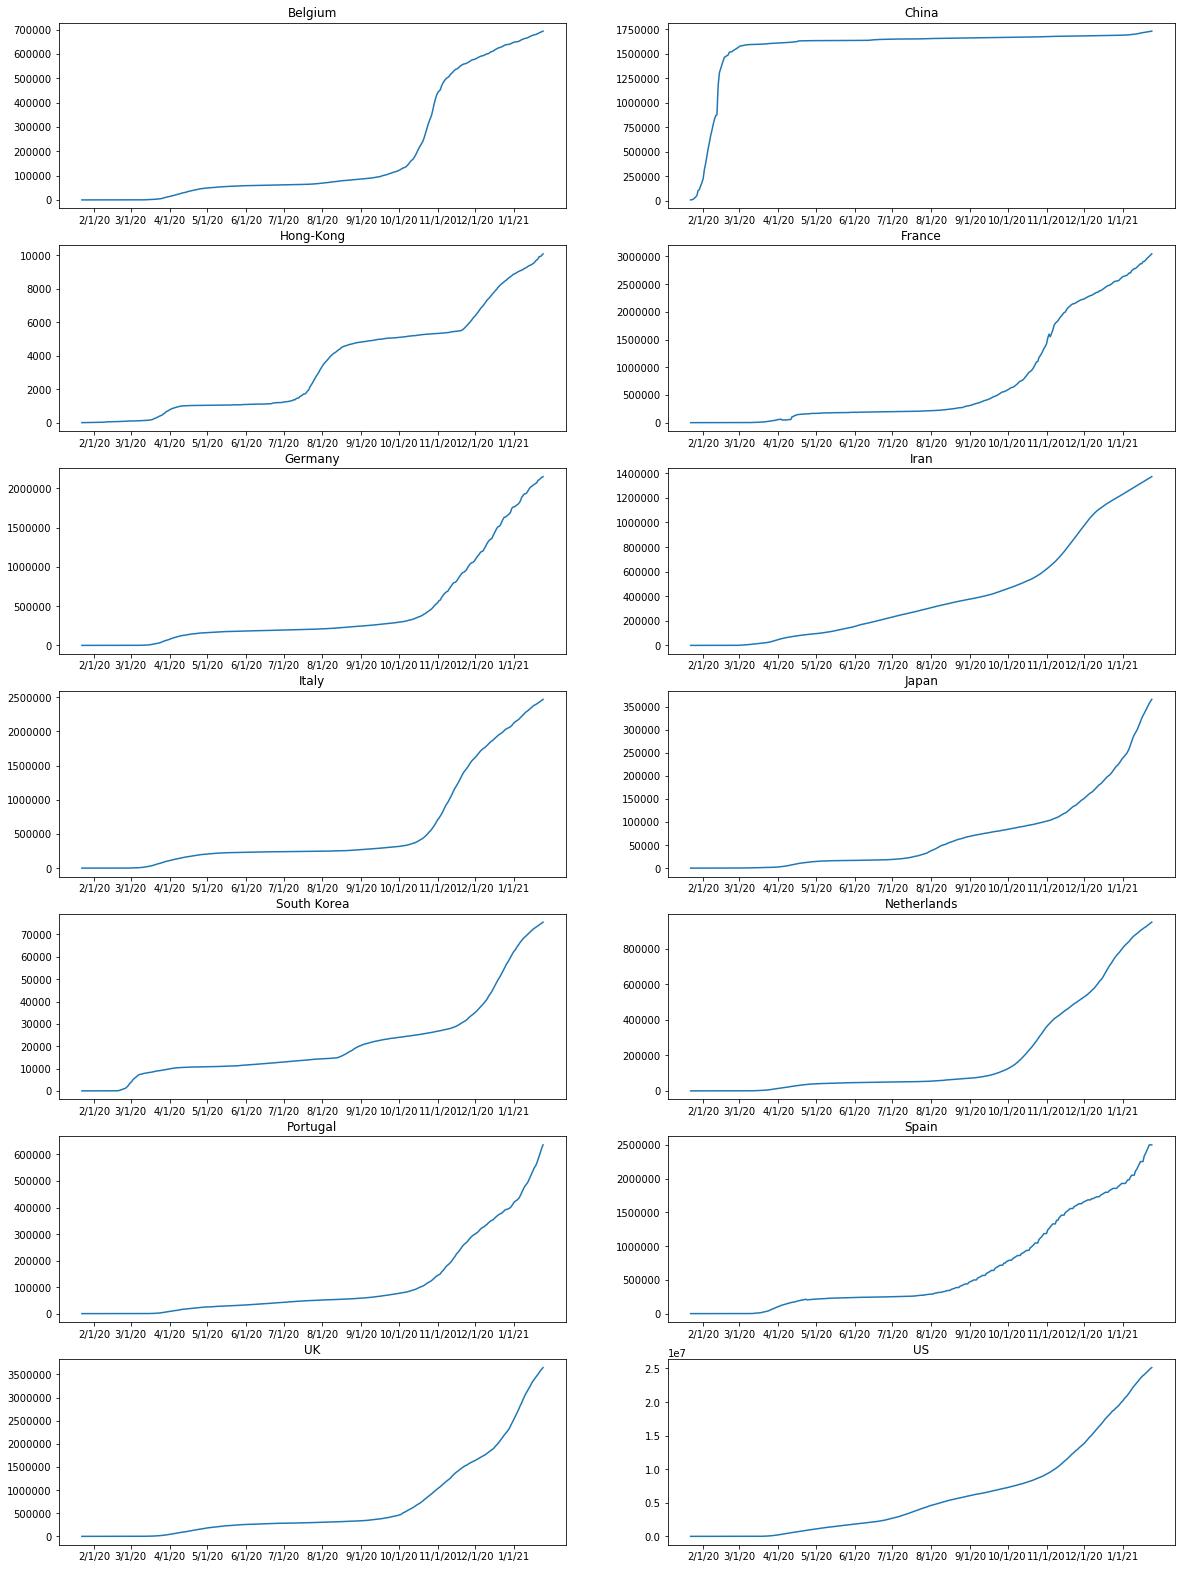

In [38]:
#now is time for plotting!
dates=list(data_cut.keys())
dates_noplot=dates_noto_plot(dates)

fig, ax=plt.subplots(7,2,figsize=(20,28))
ax[0,0].plot(dates,belgium)
ax[0,0].set_title('Belgium')
ax[0,1].plot(dates,china)
ax[0,1].set_title('China')
ax[1,0].plot(dates,hk)
ax[1,0].set_title('Hong-Kong')
ax[1,1].plot(dates,france)
ax[1,1].set_title('France')
ax[2,0].plot(dates,germany)
ax[2,0].set_title('Germany')
ax[2,1].plot(dates,iran)
ax[2,1].set_title('Iran')
ax[3,0].plot(dates,italy)
ax[3,0].set_title('Italy')
ax[3,1].plot(dates,japan)
ax[3,1].set_title('Japan')
ax[4,0].plot(dates,sk)
ax[4,0].set_title('South Korea')
ax[4,1].plot(dates,netherlands)
ax[4,1].set_title('Netherlands')
ax[5,0].plot(dates,portugal)
ax[5,0].set_title('Portugal')
ax[5,1].plot(dates,spain)
ax[5,1].set_title('Spain')
ax[6,0].plot(dates,uk)
ax[6,0].set_title('UK')
ax[6,1].plot(dates,us)
ax[6,1].set_title('US')

for i,a in enumerate(ax.flat):
    xticks = a.xaxis.get_major_ticks()
    for l in range (len(dates_noplot)):
        xticks[dates_noplot[l]].set_visible(False)

## Plot overall evolution of the number of cases
Now we do a similar analysis but taking all countries into account. We give first a representation in a linear scalre, then in a logarithmic scale.

In [48]:
def world_cumulated_plot(data_cut,scale='linear'): 
    #We use the cut data table, which only has the 
    cumul=data_cut.cumsum() #by default, NaN values are ignored
    cumul=np.sum(cumul.values.tolist(), axis=0) #if we don't have this line, there is a problem with all the province in China
    if scale=='log':
        cumul=np.log(cumul)
    fig,ax=plt.subplots(figsize=(20,10))
    ax.plot(dates,cumul)
    ax.set_title('Cumulated cases worldwide, '+scale+' scale')
    xticks = ax.xaxis.get_major_ticks()
    for l in range (len(dates_noplot)):
        xticks[dates_noplot[l]].set_visible(False)
    return

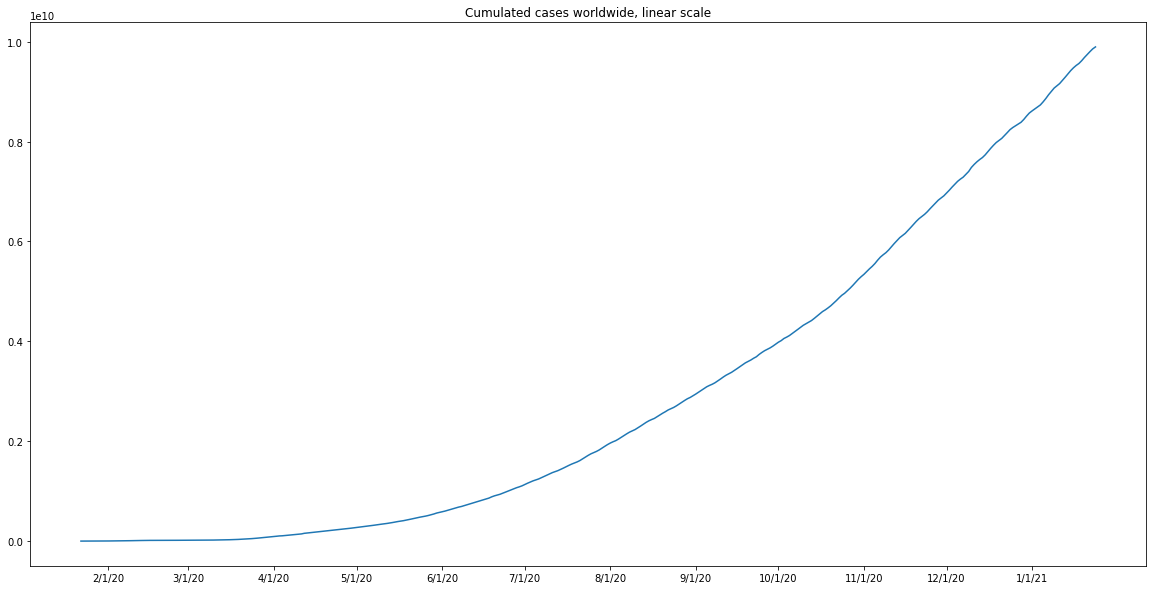

In [49]:
world_cumulated_plot(data_cut)

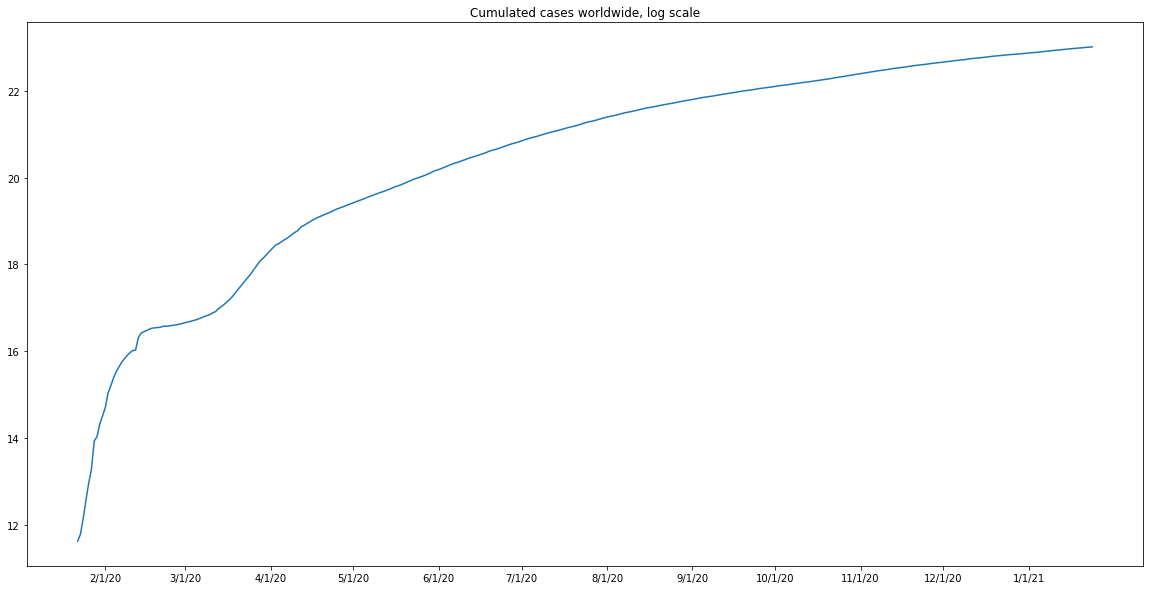

In [50]:
world_cumulated_plot(data_cut,scale='log')